In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import  GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('US_Accidents_Dec20.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (4232541, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


In [3]:
#Creating a sample test file - for Professor to test

In [5]:
rows = df.sample(frac =.008) 
# We take 8% of the dataset for testing
if (0.008*(len(df))== len(rows)):
    print(len(df), len(rows))

print(rows.shape)
print(rows.info())

(33860, 49)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33860 entries, 3841002 to 3504538
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     33860 non-null  object 
 1   Source                 33860 non-null  object 
 2   TMC                    21620 non-null  float64
 3   Severity               33860 non-null  int64  
 4   Start_Time             33860 non-null  object 
 5   End_Time               33860 non-null  object 
 6   Start_Lat              33860 non-null  float64
 7   Start_Lng              33860 non-null  float64
 8   End_Lat                12240 non-null  float64
 9   End_Lng                12240 non-null  float64
 10  Distance(mi)           33860 non-null  float64
 11  Description            33860 non-null  object 
 12  Number                 12273 non-null  float64
 13  Street                 33860 non-null  object 
 14  Side                   33860 non-n

In [7]:
#Writing 8% of data to CSV file
rows.to_csv('out.csv')

#Split 'Start_Time' attributes

In [8]:
#split 'Start-Time attribute into Year,month,weekday,day,hours and minutes'
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,Night,5,46,2016,2,0,8
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Night,Day,6,7,2016,2,0,8
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,Night,Night,Day,Day,6,49,2016,2,0,8
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,Night,Day,Day,Day,7,23,2016,2,0,8
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,Day,Day,Day,Day,7,39,2016,2,0,8


In [9]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Minute', 'Year', 'Month', 'Weekday',
       'Day'],
      dtype='object')

#Dropping unwanted attributes

In [10]:
#After Exploratory Data Analysis we found that there are few feature that can be dropped based on least significance and redundant atrributes , so that model can be trained on cleaned dataset.
least_Significant_features_to_drop = ["ID", "Source", "TMC", "Start_Time", "End_Time", "End_Lat", "End_Lng", 
                                      "Description", "Number", "Street", "County", "State", "Zipcode", "Country", 
                                      "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop"
                                      , "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
#newSet = df.drop(least_Significant_features_to_drop, axis=1)
df = df.drop(least_Significant_features_to_drop, axis=1)
#newSet.head()
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,L,Reynoldsburg,37.9,100.0,29.65,10.0,...,False,False,False,Night,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,R,Williamsburg,36.0,100.0,29.67,10.0,...,False,False,True,Night,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,R,Dayton,35.1,96.0,29.64,9.0,...,False,False,False,Day,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,R,Dayton,36.0,89.0,29.65,6.0,...,False,False,True,Day,7,39,2016,2,0,8


#Data Preprocessing:

In [11]:
#Now we will check if data has some duplicates value and remove them from the dataset
print("Total Number of rows:", len(df.index))
#newSet.drop_duplicates(inplace=True)
df.drop_duplicates
print("Total number of rows after removing duplicates:", len(df.index))

Total Number of rows: 4232541
Total number of rows after removing duplicates: 4232541


In [12]:
#Handling incorrect and missing values

In [13]:
#initially looking at the Side column
df["Side"].value_counts()

R    3467079
L     765461
           1
Name: Side, dtype: int64

In [14]:
#the output shows 1 record without Side so that can be dropped
df = df[df["Side"] != " "]
df["Side"].value_counts()

R    3467079
L     765461
Name: Side, dtype: int64

In [15]:
#next looking at visibility and pressure
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4133872.00,4156156.00
mean,9.11,29.69
std,2.82,0.86
min,0.00,0.00
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [16]:
#the output shows min as 0 which informs us that a number of records are missing them and have been replaced with 0
#we are dropping the records with missing values for visibility and pressure
df = df[df["Visibility(mi)"] != 0]
df = df[df["Pressure(in)"] != 0]
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4131229.00,4153515.00
mean,9.12,29.69
std,2.81,0.86
min,0.06,0.02
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [17]:
#analyzing the weather conditions
#outputting the total number of different conditions and their names
weather_conditions = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(weather_conditions), "\n")
print(weather_conditions)

Total number of weather conditions:  132 

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' '

In [18]:
#reducing amount of weather conditions by substituting them with a more common name

df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

common_weather = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(common_weather), "\n")
print(common_weather)

Total number of weather conditions:  12 

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' nan 'Smoke' 'Sand' 'Windy' 'Hail'
 'Thunderstorm' 'Tornado']


In [19]:
#after checking the weather conditions, we are analyzing the wind directions
#outputting the total number of different directions and their names

wind_directions = df["Wind_Direction"].unique()
print("Total number of wind directions: ", len(wind_directions), "\n")
print(wind_directions)

Total number of wind directions:  25 

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [20]:
#similarly to weather conditions, we reduce the amount of wind directions by grouping the values

df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df["Wind_Direction"] = df["Wind_Direction"].map(lambda i : i if len(i) != 3 else i[1:], na_action="ignore")
common_direction = df["Wind_Direction"].unique()

print("Total number of wind directions: ", len(common_direction), "\n")
print(common_direction)

Total number of wind directions:  11 

['Calm' 'SW' 'NW' 'W' 'NE' 'S' 'N' 'Variable' 'SE' 'E' nan]


In [21]:
#analyzing the missing values
df.isna().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Side                       0
City                     137
Temperature(F)         89873
Humidity(%)            95422
Pressure(in)           76381
Visibility(mi)         98667
Wind_Direction         83601
Wind_Speed(mph)       479284
Precipitation(in)    2065296
Weather_Condition      99024
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Civil_Twilight           141
Hour                       0
Minute                     0
Year                       0
Month                      0
Weekday                    0
Day                        0
dtype: int64

In [22]:
#from the output, we identified that many of the records don't contain informations about Precipitation so we will drop that feature
#we fill in the missing features with the mean for numerical features 
#we delete the records with missing informations for categorical features
fill_features = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df[fill_features] = df[fill_features].fillna(df[fill_features].mean())
df.dropna(inplace=True)
df.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Hour                 0
Minute               0
Year                 0
Month                0
Weekday              0
Day                  0
dtype: int64

In [23]:
#Encode target labels with value between 0 and n_classes-1
encoder = preprocessing.LabelEncoder()
df['Bump'] = encoder.fit_transform(df['Bump'])
df['Amenity'] = encoder.fit_transform(df['Amenity'])
df['Crossing'] = encoder.fit_transform(df['Crossing'])
df['Give_Way'] = encoder.fit_transform(df['Give_Way'])
df['Junction'] = encoder.fit_transform(df['Junction'])
df['No_Exit'] = encoder.fit_transform(df['No_Exit'])
df['Railway'] = encoder.fit_transform(df['Railway'])
df['Roundabout'] = encoder.fit_transform(df['Roundabout'])
df['Station'] = encoder.fit_transform(df['Station'])
df['Stop'] = encoder.fit_transform(df['Stop'])
df['Traffic_Calming'] = encoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal'] = encoder.fit_transform(df['Traffic_Signal'])
df['City'] = encoder.fit_transform(df['City'])
df['Weather_Condition'] = encoder.fit_transform(df['Weather_Condition'])
df['Wind_Direction'] = encoder.fit_transform(df['Wind_Direction'])
df['Side'] = encoder.fit_transform(df['Side'])
df['Civil_Twilight'] = encoder.fit_transform(df['Civil_Twilight'])

In [24]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,1,2577,36.9,91.0,29.68,10.0,...,0,0,0,1,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,0,8978,37.9,100.0,29.65,10.0,...,0,0,0,1,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,1,11741,36.0,100.0,29.67,10.0,...,0,0,1,1,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,1,2577,35.1,96.0,29.64,9.0,...,0,0,0,0,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,1,2577,36.0,89.0,29.65,6.0,...,0,0,1,0,7,39,2016,2,0,8


#Displaying number of records in each Severity

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


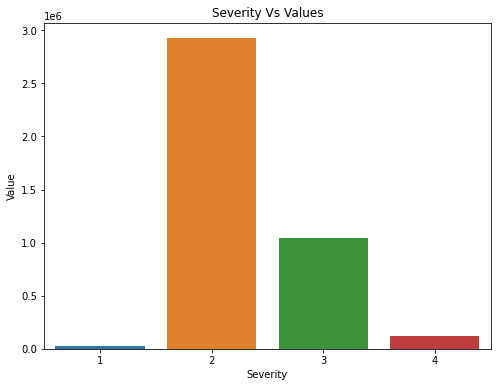

In [25]:
severityCount = df['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

#Data distribution is not uniform, we find number of records for each severity

In [26]:
size1 = len(df[df["Severity"]==1].index)
print('No. of rows in Severity 1: ',size1 )
size2 = len(df[df["Severity"]==2].index)
print('No. of rows in Severity 2: ',size2)
size3 = len(df[df["Severity"]==3].index)
print('No. of rows in Severity 3: ',size3)
size4 = len(df[df["Severity"]==4].index)
print('No. of rows in Severity 4: ',size4)

No. of rows in Severity 1:  28718
No. of rows in Severity 2:  2925644
No. of rows in Severity 3:  1043246
No. of rows in Severity 4:  119248


#the data is collected from various sources and their method of reporting the sources may vay
#So, we are broadly classifying the accidents into 2 major categories
#SEVERITY 1 - MINOR ACCIDENTS
#SEVERITY 2 - MAJOR ACCIDENTS

In [27]:
df.loc[df["Severity"] == 2, "Severity"] = 1
df.loc[df["Severity"] == 3, "Severity"] = 2
df.loc[df["Severity"] == 4, "Severity"] = 2

In [28]:
X = pd.DataFrame()
print("Size of each severity after altering the severity to 2 levels: Minor accidents & Major accidents")
size1 = len(df[df["Severity"]==1].index)
print('No. of rows in Severity 1: ',size1)
size2 = len(df[df["Severity"]==2].index)
print('No. of rows in Severity 2: ',size2)

Size of each severity after altering the severity to 2 levels: Minor accidents & Major accidents
No. of rows in Severity 1:  2954362
No. of rows in Severity 2:  1162494


In [29]:
#We take all the records of severity 2 & consider same number of records from severity 1
for i in range(1,3):
    S = df[df['Severity']==i]
    temp = S.sample(size2, random_state=42)
    X = X.append(temp)

#Reducing no. of records for further processing

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


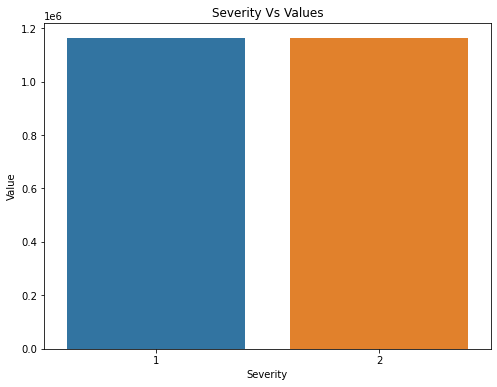

In [30]:
severityCount = X['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [31]:
print("Size of data taken for analysis ", X.shape)
X.columns

Size of data taken for analysis  (2324988, 33)


Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day'],
      dtype='object')

#Scaling the features using MinMaxScaler

In [32]:
scaler = MinMaxScaler()
featuresForScaling = ['Start_Lat', 'Start_Lng','Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)','Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day', 'City', 'Wind_Direction', 'Weather_Condition']
X[featuresForScaling] = scaler.fit_transform(X[featuresForScaling])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
3786025,1,0.379336,0.110031,0.000000,0,0.132231,0.550360,0.828283,0.513640,0.071030,...,0,0,0,1,1.000000,0.677966,0.75,0.818182,0.666667,0.100000
2945921,1,0.382903,0.704231,0.000000,1,0.033078,0.608273,0.757576,0.517438,0.063885,...,0,0,0,0,0.434783,0.016949,0.25,0.545455,0.166667,0.333333
1025903,1,0.336665,0.481612,0.000000,1,0.348654,0.428058,0.797980,0.511913,0.071030,...,0,0,0,0,0.304348,0.983051,0.75,1.000000,0.166667,0.533333
1581916,1,0.212721,0.511259,0.000000,1,0.409408,0.571223,1.000000,0.512776,0.049593,...,0,0,1,0,0.739130,1.000000,0.75,0.090909,0.000000,0.333333
3242552,1,0.161637,0.766872,0.000075,1,0.892121,0.589928,0.777778,0.516575,0.049593,...,0,0,0,1,0.217391,0.118644,1.00,0.909091,0.666667,0.866667


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324988 entries, 3786025 to 340507
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Distance(mi)       float64
 4   Side               int64  
 5   City               float64
 6   Temperature(F)     float64
 7   Humidity(%)        float64
 8   Pressure(in)       float64
 9   Visibility(mi)     float64
 10  Wind_Direction     float64
 11  Wind_Speed(mph)    float64
 12  Precipitation(in)  float64
 13  Weather_Condition  float64
 14  Amenity            int64  
 15  Bump               int64  
 16  Crossing           int64  
 17  Give_Way           int64  
 18  Junction           int64  
 19  No_Exit            int64  
 20  Railway            int64  
 21  Roundabout         int64  
 22  Station            int64  
 23  Stop               int64  
 24  Traffic_Calming    int64  
 25  Traffic_Signa

#Decision Tree

In [34]:
#Train - Test split 
X1, X1_test_data = train_test_split(X, test_size=.2, random_state=42)
print(X1.shape, X1_test_data.shape)

(1859990, 33) (464998, 33)


In [35]:
#Train-valid split
sampleSet = X1
y_data = sampleSet["Severity"]
X_data = sampleSet.drop("Severity", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

In [36]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(1394992, 32) (1394992,)
(464998, 32) (464998,)


In [37]:
# Create Decision Tree classifer
clf = DecisionTreeClassifier(random_state=42)

#Train the classifier
parameter = [{"criterion":["gini", "entropy"], "max_depth": [5,10,15,30]}]

#cross-validated grid-search
gridSearch = GridSearchCV(clf,parameter,verbose = 5,n_jobs=-1)
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:  1.4min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:  2.2min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:  2.6min remaining:   17.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.8min finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=5)

In [38]:
#Print parameter score
print("Parameter score using GridSearchCV in sklearn")
print("Parameter score: ",gridSearch.best_params_)
print("Training score: ",gridSearch.score(X_train, y_train))
print("validation score: ",gridSearch.score(X_val, y_val))

Parameter score using GridSearchCV in sklearn
Parameter score:  {'criterion': 'entropy', 'max_depth': 30}
Training score:  0.9587574695768865
validation score:  0.8106335941229855


In [39]:
#Print parameter score
print("Scoring only using the decision tree classifier")
clf.fit(X_train,y_train)
print("Training score: ",clf.score(X_train, y_train))
print("Validation score: ",clf.score(X_val, y_val))

Scoring only using the decision tree classifier
Training score:  0.9994157672588804
Validation score:  0.8047389451137424


In [40]:
accuracy = dict()
f1 = dict()

y_pred_dt = clf.predict(X_val)
accuracy['Decision Tree']=metrics.accuracy_score(y_val, y_pred_dt)
f1['Decision Tree'] = f1_score(y_val, y_pred_dt, average="macro")
print("Accuracy of Decision Tree:",accuracy['Decision Tree'])

Accuracy of Decision Tree: 0.8047389451137424


In [41]:
print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    697787
           2       1.00      1.00      1.00    697205

    accuracy                           1.00   1394992
   macro avg       1.00      1.00      1.00   1394992
weighted avg       1.00      1.00      1.00   1394992

              precision    recall  f1-score   support

           1       0.81      0.80      0.80    232458
           2       0.80      0.81      0.81    232540

    accuracy                           0.80    464998
   macro avg       0.80      0.80      0.80    464998
weighted avg       0.80      0.80      0.80    464998



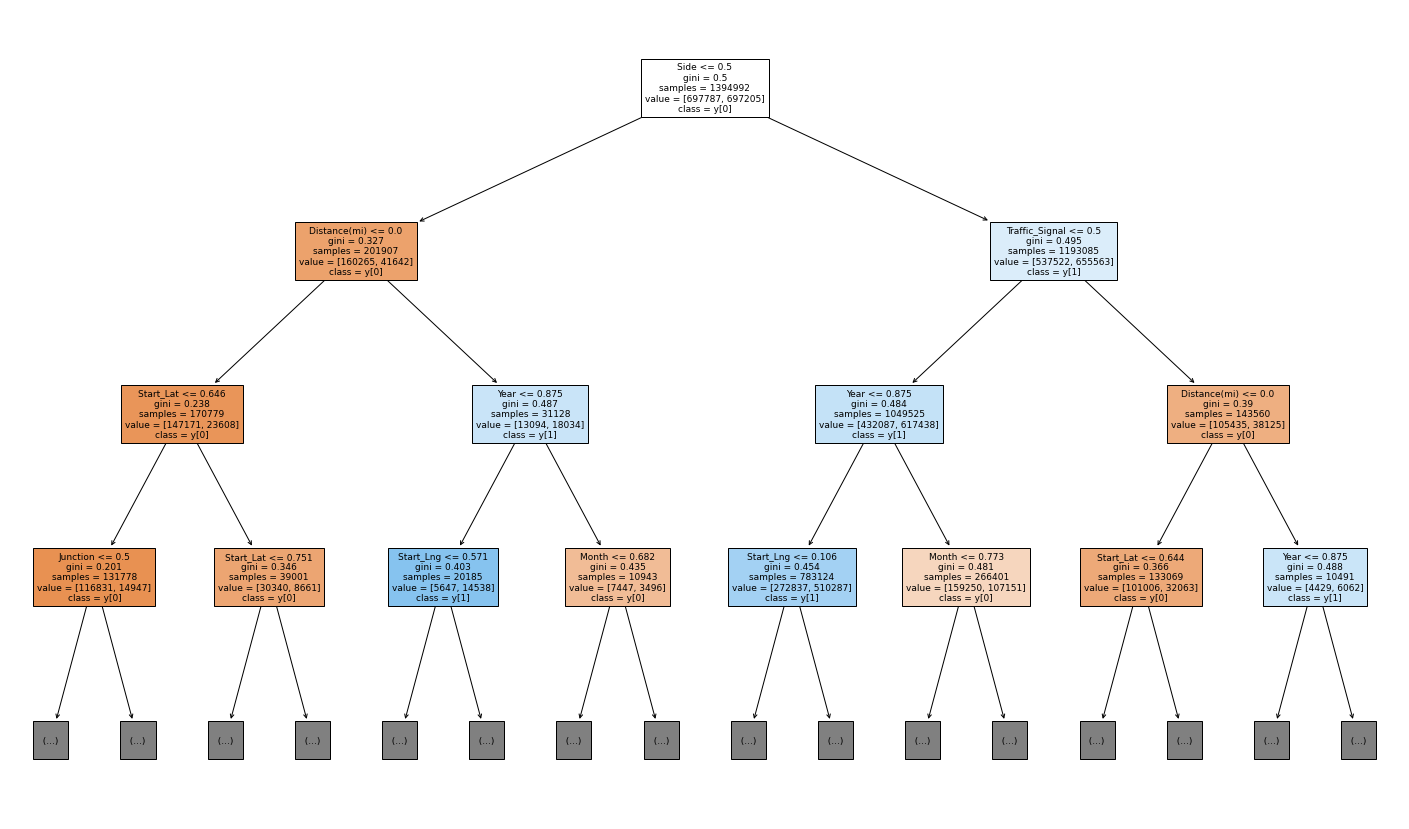

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (25,15))
plot_tree(clf,max_depth=3,fontsize=9,feature_names=X_train.columns.to_list(),class_names=True,filled = True)
fig.savefig('DecisionTree.png')

#Gaussian Naive Bayes classifier

In [43]:
#Gaussian Naive Bayes classfier
gausNaiveB = GaussianNB()
gausNaiveB.fit(X_train, y_train)

print("Training score:", gausNaiveB.score(X_train, y_train))
print("Validation score:", gausNaiveB.score(X_val, y_val))

Training score: 0.6355592003395002
Validation score: 0.6352199364298341


In [44]:
y_pred_nb = gausNaiveB.predict(X_val)

print(classification_report(y_train, gausNaiveB.predict(X_train)))
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.78      0.38      0.51    697787
           2       0.59      0.89      0.71    697205

    accuracy                           0.64   1394992
   macro avg       0.68      0.64      0.61   1394992
weighted avg       0.69      0.64      0.61   1394992

              precision    recall  f1-score   support

           1       0.78      0.38      0.51    232458
           2       0.59      0.89      0.71    232540

    accuracy                           0.64    464998
   macro avg       0.68      0.64      0.61    464998
weighted avg       0.68      0.64      0.61    464998



In [45]:
# Model Accuracy, how often is the classifier correct
accuracy['Naive Bayes'] = metrics.accuracy_score(y_val, y_pred_nb)
print("Accuracy of NB:",accuracy['Naive Bayes'])
f1['Naive Bayes'] = f1_score(y_val, y_pred_nb, average="macro")

Accuracy of NB: 0.6352199364298341


#Random Forest Classifier

In [46]:
rand_Forest = RandomForestClassifier(n_jobs=-1, random_state=42)
grid = [{"n_estimators": [200], "max_depth": [30]}]
clf_rand_For = GridSearchCV(rand_Forest, grid, verbose=5, n_jobs=-1)
clf_rand_For.fit(X_train, y_train)

print("Best parameters scores:")
print(clf_rand_For.best_params_)
print("Train score:", clf_rand_For.score(X_train, y_train))
print("Validation score:", clf_rand_For.score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 15.3min remaining: 23.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.3min finished


Best parameters scores:
{'max_depth': 30, 'n_estimators': 200}
Train score: 0.9541280523472536
Validation score: 0.8091776738824683


In [47]:
rand_Forest.fit(X_train,y_train)
y_pred_rand_Forest=rand_Forest.predict(X_val)

In [48]:
#print(confusion_matrix(y_val, y_pred_rand_Forest))  
print(classification_report(y_val, y_pred_rand_Forest))
# Model Accuracy, how often is the classifier correct?
accuracy['Random Forest'] =metrics.accuracy_score(y_val, y_pred_rand_Forest)
print("Accuracy:",accuracy['Random Forest'])
f1['Random Forest'] = f1_score(y_val, y_pred_rand_Forest, average="macro")

              precision    recall  f1-score   support

           1       0.85      0.78      0.81    232458
           2       0.79      0.86      0.82    232540

    accuracy                           0.82    464998
   macro avg       0.82      0.82      0.82    464998
weighted avg       0.82      0.82      0.82    464998

Accuracy: 0.8176895384496278


#Logistic Regression

In [49]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix  
Log_reg = LogisticRegression(solver='lbfgs', max_iter=4000)
Log_reg.fit(X_train, y_train)
y_pred_Log_reg = Log_reg.predict(X_val)
#print(confusion_matrix(y_val, y_pred_Log_reg))  
print(classification_report(y_val, y_pred_Log_reg))

              precision    recall  f1-score   support

           1       0.71      0.62      0.66    232458
           2       0.66      0.75      0.71    232540

    accuracy                           0.69    464998
   macro avg       0.69      0.69      0.69    464998
weighted avg       0.69      0.69      0.69    464998



In [50]:
print(" Train score:", Log_reg.score(X_train, y_train))
print("Validation score:", Log_reg.score(X_val, y_val))

 Train score: 0.687134406505557
Validation score: 0.6864674686772846


In [51]:
#logistic regression with GridSearchCV
logistic_regres = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(logistic_regres, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score witg Grid search:", grid.score(X_train, y_train))
print("Validation score with grid search:", grid.score(X_val, y_val))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   45.5s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   52.4s remaining:   45.9s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.5min remaining:   22.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


Best parameters scores:
{'solver': 'newton-cg'}
Train score witg Grid search: 0.6871516109052955
Validation score with grid search: 0.6864653181304006


In [54]:
accuracy['Logistic regression'] = metrics.accuracy_score(y_val, y_pred_Log_reg)
print("Accuracy of Logistic Regression classifier:",accuracy['Logistic regression'])
f1['Logistic regression'] = f1_score(y_val, y_pred_Log_reg, average="macro")

Accuracy of Logistic Regression classifier: 0.6864674686772846


#Support Vector Machines

In [55]:
param = [{"kernel": ["linear", "rbf", "sigmoid"], "C": [.2, .5, .8, 1.]}, 
         {"kernel": ["poly"], "C": [.2, .5, .8, 1.], "degree": [2, 3, 4]}]

svm_svc = svm.SVC(verbose=5, random_state=42)
grid_search = GridSearchCV(svm_svc, param, verbose=5, n_jobs=-1)

x, x_test = train_test_split(X, test_size=.2, random_state=42)
print("train test split: ", x.shape, x_test.shape)

train test split:  (1859990, 33) (464998, 33)


In [56]:
smpl = x.sample(5_000, random_state=42)
y_smpl = smpl["Severity"]
x_smpl = smpl.drop("Severity", axis=1)
grid_search.fit(x_smpl, y_smpl)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 114 out of 120 | elapsed:   16.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   17.0s finished


[LibSVM]

GridSearchCV(estimator=SVC(random_state=42, verbose=5), n_jobs=-1,
             param_grid=[{'C': [0.2, 0.5, 0.8, 1.0],
                          'kernel': ['linear', 'rbf', 'sigmoid']},
                         {'C': [0.2, 0.5, 0.8, 1.0], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             verbose=5)

In [57]:
print("top scores of parameters:", grid_search.best_params_)
print("train score:", grid_search.score(x_smpl, y_smpl))

top scores of parameters: {'C': 0.5, 'degree': 4, 'kernel': 'poly'}
train score: 0.7298


In [58]:
print("default scores:", svm_svc.fit(x_smpl, y_smpl))
print("train score:", svm_svc.score(x_smpl, y_smpl))

[LibSVM]default scores: SVC(random_state=42, verbose=5)
train score: 0.7128


In [59]:
#pd.DataFrame(grid_search.cv_results_).sort_values(by = "rank_test_score")
smpl = x.sample(10_000, random_state = 42)
y_smpl = smpl["Severity"]
x_smpl = smpl.drop("Severity", axis=1)
x_train, x_val, y_train, y_val = train_test_split(x_smpl, y_smpl, test_size = .2, random_state = 42)
print("train: ", x_train.shape, y_train.shape)
print("validation: ", x_val.shape, y_val.shape)

train:  (8000, 32) (8000,)
validation:  (2000, 32) (2000,)


In [60]:
svm_svc = svm.SVC(**grid_search.best_params_, random_state = 42)
svm_svc.fit(x_train, y_train)

SVC(C=0.5, degree=4, kernel='poly', random_state=42)

In [61]:
print("train: ", svm_svc.score(x_train, y_train))
print("validation: ", svm_svc.score(x_val, y_val))

train:  0.7185
validation:  0.706


In [62]:
y_pred = svm_svc.predict(x_val)

In [63]:
print(classification_report(y_train, svm_svc.predict(x_train)))
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.62      0.69      4031
           2       0.68      0.81      0.74      3969

    accuracy                           0.72      8000
   macro avg       0.73      0.72      0.72      8000
weighted avg       0.73      0.72      0.72      8000

              precision    recall  f1-score   support

           1       0.74      0.61      0.67       980
           2       0.68      0.79      0.73      1020

    accuracy                           0.71      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.71      0.70      2000



In [64]:
y_pred = svm_svc.predict(x_val)

In [65]:
accuracy['Support Vector Machine'] = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:",accuracy['Support Vector Machine'])
f1['Support Vector Machine'] = f1_score(y_val, y_pred, average="macro")
#print(f1['Support Vector Machine'])

Accuracy: 0.706


In [66]:
#Comparing accuracy of each model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


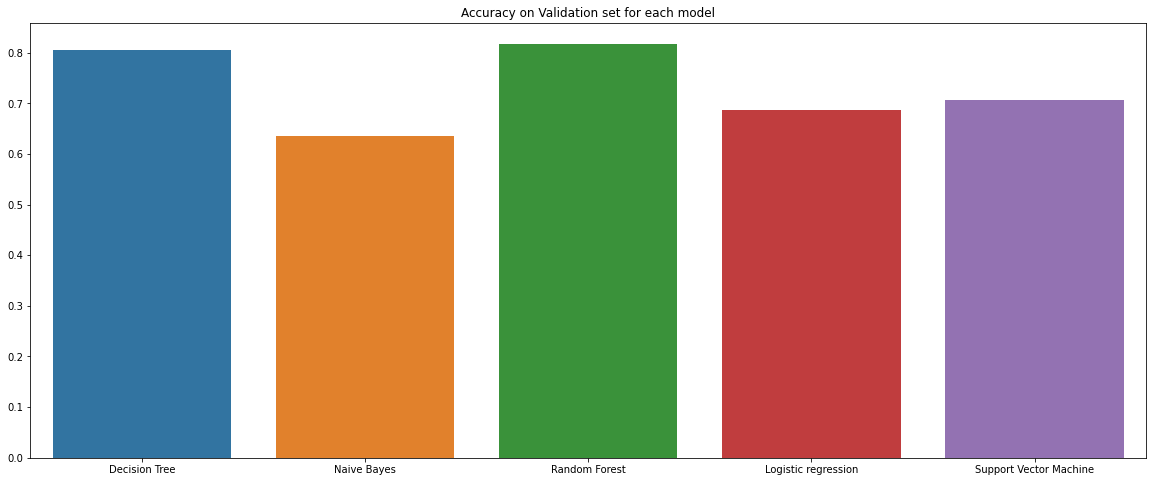

In [67]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

In [68]:
#Comparing f1 score of each model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


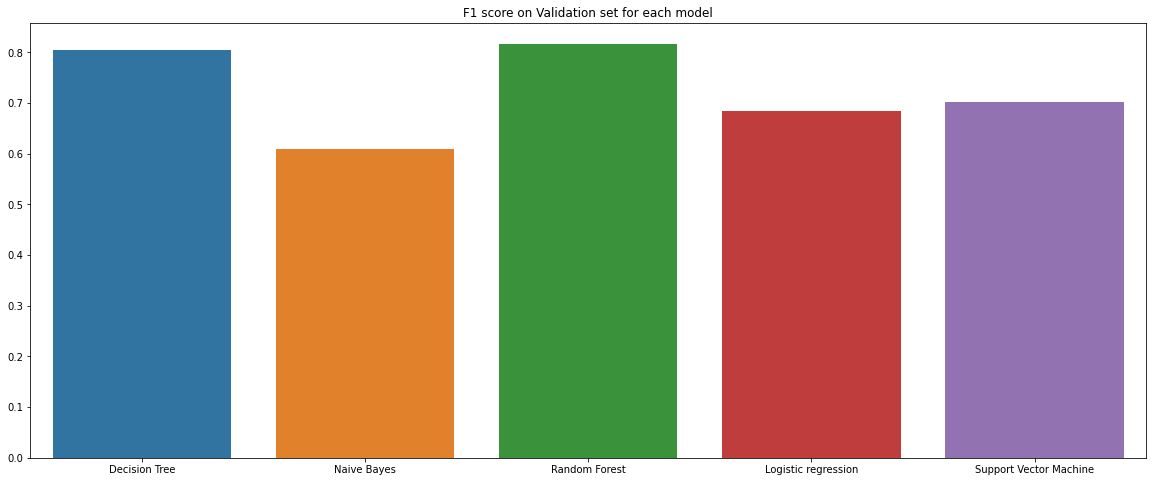

In [69]:
plt.figure(figsize=(20, 8))
plt.title("F1 score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

In [70]:
#Testing sample data on the model we got the best F1 score - Random Forest

In [71]:
smpl_test_data = X1_test_data
y_smpl_test_data = smpl_test_data["Severity"]
X_smpl_test_data = smpl_test_data.drop("Severity", axis=1)

y_pred_ran_for = rand_Forest.predict(X_smpl_test_data)
print(classification_report(y_smpl_test_data, y_pred_ran_for))
print("Accuracy: ",metrics.accuracy_score(y_smpl_test_data, y_pred_ran_for))
print("F1 score: ",f1_score(y_smpl_test_data, y_pred_ran_for, average="macro"))
#con_mat = confusion_matrix(y_true=y_smpl_test_data, y_pred=y_pred_ran_for)
#print(con_mat)

              precision    recall  f1-score   support

           1       0.85      0.78      0.81    232249
           2       0.79      0.86      0.83    232749

    accuracy                           0.82    464998
   macro avg       0.82      0.82      0.82    464998
weighted avg       0.82      0.82      0.82    464998

Accuracy:  0.8181454543890512
F1 score:  0.8178061784264817
